**<center><font color='#023F7C' size="6.5">Course 1: Feature Engineering </font>** <br>
<font color=#023F7C size=4>**Hi!ckathon #4 - AI & Supply Chain**</font> <br>
<font color=#023F7C size=2> 6:15PM-8:00PM </font> <br>

</center>

<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >

<font color="#023F7C">**Author**:</font> Laurène DAVID, Machine Learning Research Engineer @ Hi! PARIS <br>



# **Pre-Hi!ckathon training** 🚀

The Hi!ckathon is a competitive AI and Data Science challenge organized by **Hi! PARIS**, the Center dedicated to data science and AI. The center was created by **HEC Paris** and **Institut Polytechnique de Paris** in September 2020 with Inria joining in 2021.

This 4th edition will take place in several stages:
- First, a **preparation phase**, starting on November 13. Three intermediate-level **courses** will be given. In addition, two **round tables** will be held on November 16 and 21, with Hi! PARIS's corporate donors. These events will take place after class, from 6 pm to 8 pm.

- A **Career Fair** will be held on November 23 starting at 6:45 pm, at Télécom Paris. Come and discover internship and job opportunities in great companies and start-ups!

- The **final sprint** on the weekend of December 1-4. You will have the opportunity to share a unique experience during this in-person weekend and to learn a lot thanks to mixed teams with fellow students with a large variety of backgrounds!


For more information, you can visit the Hi!ckathon's official [website](https://www.hi-paris.fr/hickathon/).

<img src = https://www.hi-paris.fr/wp-content/uploads/2023/10/Hickathon-4-Presentation-169-1536x864.png width = "800" height = "500" >






**About the intermediate-level courses** <br>
Three intermediate-level courses will be provided by Hi! PARIS' Engineering Team. The goal of these courses is to refresh your memory on some key Data Science concepts and help you prepare for the Hi!ckathon's final sprint.

In the first course, we will focus on the first steps of a Data Science project: **Data Cleaning**, **Data Exploration** and **Feature Engineering**. <br> These steps insure you get the best possible outcome when training a Machine Learning model. They are essential steps in a Data Science project timeline.


<img src = https://miro.medium.com/v2/resize:fit:1400/1*RiEfzta7FkYiRq44jhSb7g.png width = "650" height = "500" >


In the following two courses, you will learn how to build Machine Learning and Deep Learning models, how to test their performance and how to improve them. At the end of the courses, we will also give a brief introduction to Explainability in Machine Learning.
- November 27, 2023 (6:15pm-8:00pm): **Machine Learning**
- November 29, 2023 (6:15pm-8:00pm): **Deep Learning and Explainability**











In these courses, we will assume you know how to code in Python and use its Data Science libraries. <br> If you do need help, here are some ressources
- Python tutorial: https://www.geeksforgeeks.org/python-programming-language/?ref=lbp
- Python for Data Analysis (free book): https://wesmckinney.com/book/
- CodeWars (Python training): https://www.codewars.com/


In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
import warnings
warnings.filterwarnings("ignore")

# **I. Data Cleaning 🧹**

Data Cleaning is usually the first step of any Data Science project and can sometimes be very time consuming. <br>
It involves identifying and correcting errors, inconsistencies or incomplete data within a dataset.
- Handle missing values
- Remove duplicates/irrelevant information
- Clean text data with an incorrect format


**Why is it important ?** <br>
This step is crucial since it insures quality data is used during your analysis. <br> For Machine Learning models, it can help algorithms give more accurate and reliable results.

**Presentation of the use case** <br>
For today's course, we will analyze a dataset with 6000 spotify tracks and 20 features. <br>
The goal of the project will be to:
1. Build a Machine Learning model that can **predict the genre of a song**
2. Build a Machine Learning model that can **predict the popularity of a song**



In [3]:
# Read the CSV file into a Pandas DataFrame
dataset = pd.read_csv("spotify_tracks.csv")

Here is a description of each column in the dataset. <br>

| Column | Description |
| ------ | ------------ |
| **track_id** | The Spotify ID for the track |
| **artists** | The artists' names who performed the track |
| **album_name** | The album name in which the track appears |
| **track_name** | Name of the track |
| **popularity** | The popularity of a track is a value between 0 and 100.
| **duration_ms** | The track length in milliseconds |
| **explicit** | Whether or not the track has explicit lyrics |
| **danceability** | Danceability describes how suitable a track is for dancing |
| **energy** | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity
| **key** | The key the track is in. Integers map to pitches using standard Pitch Class notation |
| **loudness** | The overall loudness of a track in decibels (dB) |
| **mode** | Mode indicates the modality (major or minor) of a track (major=1, minor=0) |
| **speechiness** | Speechiness detects the presence of spoken words in a track |
| **acousticness** | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. |
| **instrumentalness** | Predicts whether a track contains no vocals |
| **liveness** | Detects the presence of an audience in the recording|
| **valence** | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track |
| **tempo** | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology |
| **time_signature** | An estimated time signature. The time signature (meter) is a notational convention <br> to specify how many beats are in each measure. |
| **track_genre** | The genre in which the track belongs |

You can find more information on the original dataset [here](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset). <br>
**Note**: We will only use a subset of the original "spotify-tracks-dataset" in this course.

In [4]:
# Get general information on the dataset (ncol, nrow, nbr missing values, dtypes)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          6000 non-null   object 
 1   artists           6000 non-null   object 
 2   album_name        5498 non-null   object 
 3   track_name        6000 non-null   object 
 4   popularity        6000 non-null   int64  
 5   duration_ms       6000 non-null   int64  
 6   explicit          5888 non-null   object 
 7   danceability      6000 non-null   float64
 8   energy            5920 non-null   float64
 9   key               6000 non-null   int64  
 10  loudness          6000 non-null   float64
 11  mode              6000 non-null   int64  
 12  speechiness       6000 non-null   float64
 13  acousticness      6000 non-null   float64
 14  instrumentalness  6000 non-null   float64
 15  liveness          6000 non-null   float64
 16  valence           6000 non-null   float64


## **1. Handle missing values**

Real-word data often contains missing values. This can be due to technical failures, data entry issues, incompatible data formats or even intentional omissions (for privacy concerns). Examples include a lack of response to a survey or equipment failures when collecting data.

To handle these missing values, there are a few strategies that can be used. Here is a list of common ones:
- Replace NaN with the **mean** or **median value** (for continuous data)
- Replace NaN with the **most frequent value** (for categorical data)
- Create a **new category** for the missing values (for categorical data)
- Use a **Machine Learning model** to predict the missing values (KNN, Random Forest,...)







In [5]:
# Number of missing values for each variable
dataset.isna().sum()

track_id              0
artists               0
album_name          502
track_name            0
popularity            0
duration_ms           0
explicit            112
danceability          0
energy               80
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
track_genre           0
dtype: int64

**<u>Reminder</u>: Continuous vs Categorical data** <br>
- **Categorical variables** are made of discrete values that fall into distinct categories or groups. <br>
Here is how you can identify them in a dataset:
  - They usually take a small number of unique values (not always the case).
  - They are often encoded as `object` types with pandas but they can also be listed as `int` types.
- **Continuous variables** are numbered values that can take any value within a particular range. <br> Examples of continuous variables include Price, Weight, Speed...

In [6]:
# Get the data types of the selected variables
dataset[["album_name","explicit","energy"]].dtypes

album_name     object
explicit       object
energy        float64
dtype: object

In [7]:
# Get the number of unique values of the selected variables 
dataset[["album_name","explicit","energy"]].nunique()

album_name    2678
explicit         2
energy        1177
dtype: int64

**Tips**: A mean value should be used on variable's with a "normal" distribution (no strong skewness, outliers). <br> A median value should be used when the distribution is skewed with many outliers.

In [8]:
# Use sklearn's SimpleImputer function to replace mean (or median)
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy="mean")
dataset["energy"] = mean_imputer.fit_transform(dataset[["energy"]]) 

In [9]:
# Use Pandas' fillna() function to replace with most frequent value
most_frequent_value = dataset["explicit"].value_counts().index[0]
dataset["explicit"] = dataset["explicit"].fillna(most_frequent_value)

You can also chose to delete the rows or columns that contain missing values. This can be a viable option in cases when the amount of missing values is small.

<br>

<img src = https://phoenixnap.com/kb/wp-content/uploads/2021/06/drop-missing-values-visual-example.png width = "500" height = "250" >


In [10]:
# Drop the remaining missing values
dataset.dropna(inplace=True)

**Recommandation**: There is no "one-size-fits-all" solution to handle missing values. Evaluate the impact of different imputation strategies on your model and be careful to not introduce to much bias in the data when using them. <br>


## **2. Remove irrelevant information**

The `track_id` variable is specific to each track and might note contain any information on the track's genre. <br>
Since we are keeping `track_name`, we can remove `album_name` from our analysis.


In [11]:
# Drop duplicate rows and irrelevant features
dataset.drop_duplicates(inplace=True)
dataset.drop(columns=["track_id","album_name"],inplace=True)

## **3. Clean text data**

Handling text data in any Machine Learning project can be a difficult task.
Valuable information might be present in text that can't be used by a model in its raw form since models can only take numerical data as input.

To clean variables containing large amounts of text, you can try the following methods:
- Lowercasing each word
- Removing stop words with little significance (examples: a, an, the, and, but, ...)
- Spell checking and correction
- Removing punctuation and special characters




**Text cleaning tools**: <br>
In Python, cleaning text data often involves using regex patterns and NLP libraries such as `nltk` and `spacy`. <br>

In this course we won't cover NLP specific preprocessing techniques such as tokenization and stemming. <br> If you want to learn more, you can read the following [article](https://medium.com/mlearning-ai/nlp-tokenization-stemming-lemmatization-and-part-of-speech-tagging-9088ac068768).

In [12]:
# Regex pattern to remove punctuation
pattern = r'[\[\]()\-:;",/\.\.\.‘\'’?!“&]'

In [13]:
# Run this cell if you want to load stopwords with nltk (doesn't work with JupyterLite, works with other IDE's)

# import nltk
# nltk.download('stopwords')
# stopwords = nltk.corpus.stopwords.words(fileids=('english', 'spanish'))

In [14]:
# Load english and spanish stopwords from .txt file
with open("stopwords.txt", "r", encoding="utf-8") as text:
    lines = text.readlines()

stopwords = [word.replace("\n","") for word in lines]
stopwords.extend(["love","remastered","remaster","feat","remix","version"])

In [15]:
clean_tracks = []
for track in dataset["track_name"].to_list():
  # remove punctuation, numbers
  track = track.lower()
  track = re.sub(pattern,"",track).replace("  "," ")

  # remove stopwords
  clean_text = [text for text in track.split(" ") if text not in stopwords]
  clean_text = " ".join(clean_text)
  clean_tracks.append(clean_text)

In [16]:
dataset["track_name"] = clean_tracks

We will also clean the `artists` variable by only selecting the main artist (the first artist listed). <br>
This will help simplify the data preprocessing step we will perform latter.




In [17]:
# Create a function that selects the first artist
def clean_artists(x):
  return x.split(";")[0]

In [18]:
dataset["artists"] = dataset["artists"].apply(clean_artists)

# **II. Data Exploration 🔍**
Data Exploration refers to the process of performing initial investigations on the data, with the help of summary statistics and graphical representations. It is mainly used for these three reasons:
- **Discover patterns and relationships**: Detect bias in the data, find relevant variables for your analysis
- **Detect anomalies and outliers**: Identify extreme values and potentially remove them
- **Apply statistical tests**: Test correlation, non-linearity, independance...



In [19]:
# Install Seaborn in JupyterLite 
import piplite
await piplite.install('seaborn')

# !pip install seaborn

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Here is a reminder of popular data visualization libraries in Python:
- `matplotlib`: Foundational and highly customizable plotting library
- `seaborn`: High-level plotting library built on top of Matplotlib
- `plotly`: Interactive and web-based plotting library

<br>

<img src = https://coding-blocks.github.io/DS-NOTES/_images/matplotlib1.png width = "600" height = "300" >

Some popular plot types include: scatter plots, histograms and bar plots. <br>
For more examples of plots, you can visit the Python Graph Gallery [here](https://python-graph-gallery.com/).

## **1. Univariate Data Analysis**

Univariate Data Analysis involves **analyzing and describing the characteristics of variables individually**. <br>

It includes studying a variable's distribution and range in the case of continuous data. <br> For categorical data, it can mean analyzing the frequency of each possible values.


**Frequency plot** <br>
Categorical variables tend to have a small number of unique values. <br> To study these kinds of variables, we will plot the frequency of each category in the data.


In [21]:
# Select categorical variables
categorical_var = dataset.select_dtypes(include=["object"]).columns.to_list()
categorical_var.extend(["key","mode","time_signature"])

In [22]:
# Number of unique values per variable
dataset[categorical_var].nunique()

artists           1253
track_name        3880
track_genre          6
key                 12
mode                 2
time_signature       5
dtype: int64

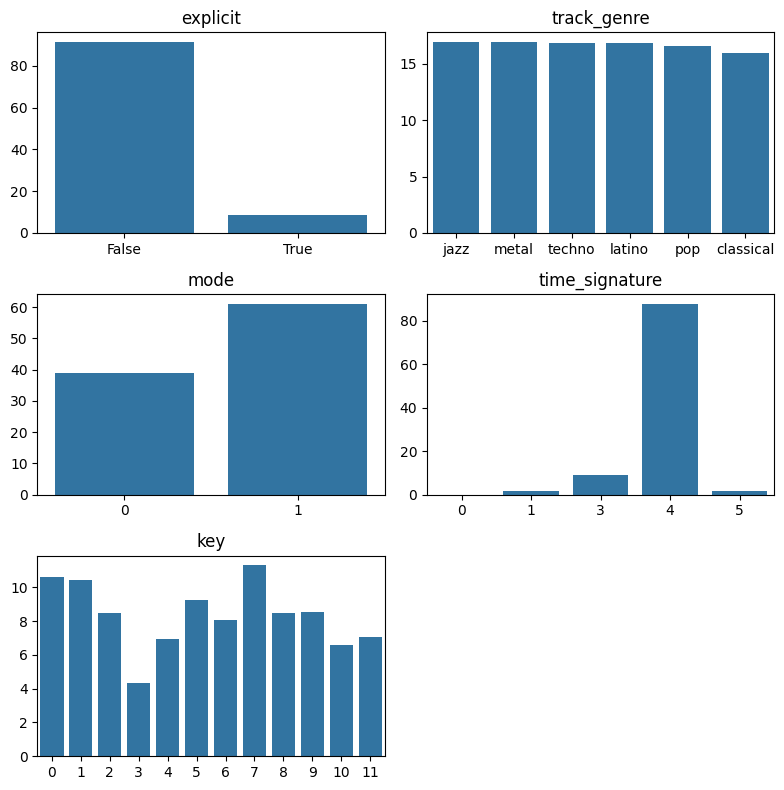

In [23]:
# Select categorical variables with small number unique values
df_barplot = dataset[["explicit","track_genre","mode","time_signature","key"]]

# Create barplot with frequency for each variable
plt.figure(figsize=(8,8))

for c,var in enumerate(df_barplot.columns):
  # compute frequency of each unique value
  df = df_barplot[var].value_counts(normalize=True).to_frame("frequency").reset_index(names=var)
  df["frequency"] = df["frequency"]*100

  # plot the barplot
  plt.subplot(3,2,c+1)
  sns.barplot(data=df, x=var, y="frequency")
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

**Histogram/Distribution** <br>
Histograms are often used for continuous data. <br> They allow you identify whether the distribution of a variable is symmetric (normal distribution), skewed or bimodal.


<img src = https://chartio.com/assets/db1384/tutorials/charts/histograms/8f583a5fe6872609b95c00a4c75a30b9bf3f0ee012ca6590563e3510ffd14841/histogram-example-2.png width = "500" height = "300" >

They can give you an indication on how to fill a missing value or what ML model to select (since some require a normal distribution). <br> It is also a great way to detect bias in the data.

In [24]:
# Select continuous variables
continuous_var = dataset.drop(columns=categorical_var).columns.to_list()

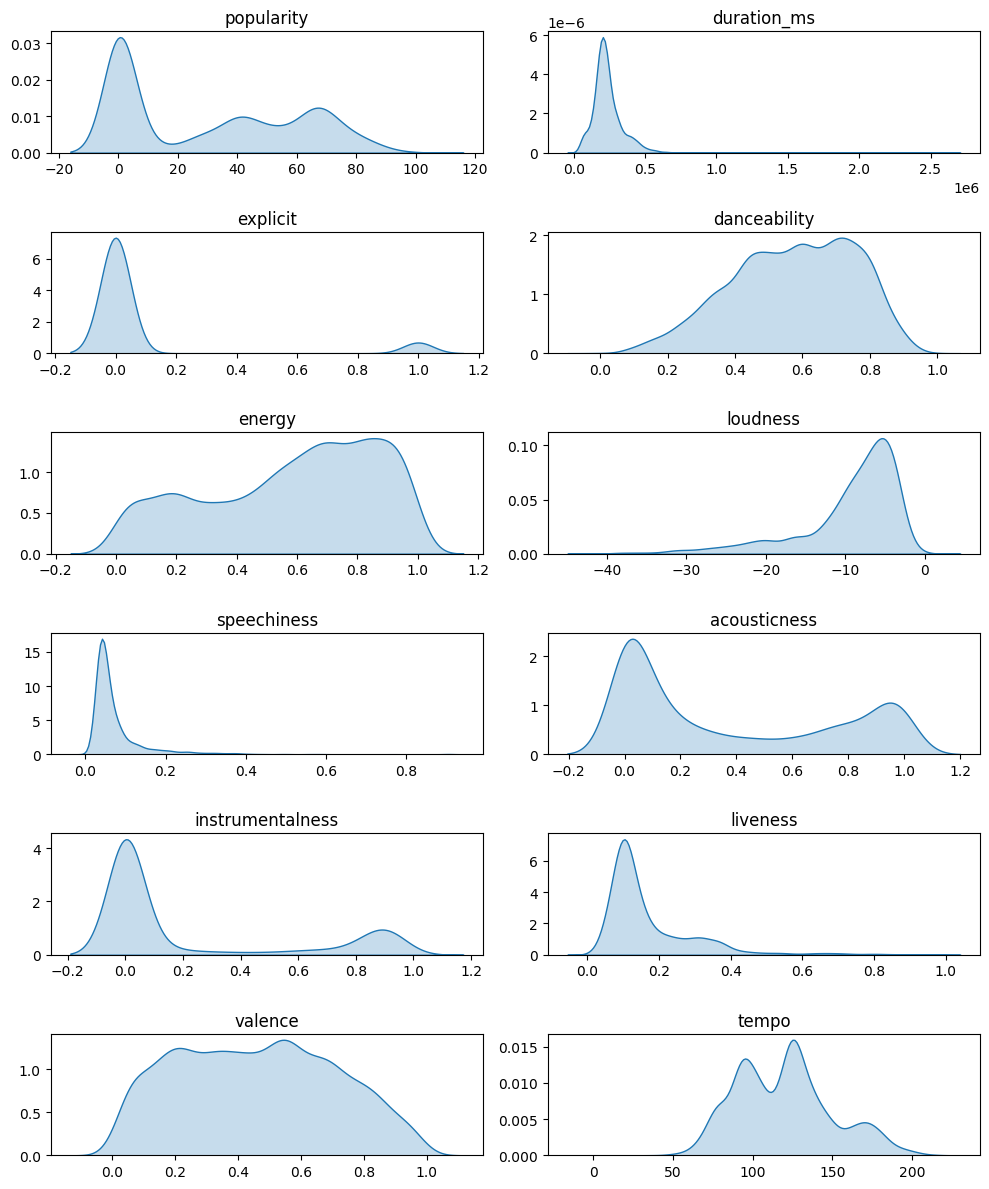

In [25]:
plt.figure(figsize=(10,12))

for c,var in enumerate(continuous_var):
  plt.subplot(6,2,c+1)
  sns.kdeplot(data=dataset[continuous_var], x=var, fill=var)
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

**Detect outliers** <br>
Outliers are data points that significantly deviate from the majority of the data. <br> Keeping these "extreme" values can lead to suboptimal performances and can hinder a model's ability to generalize.



Outliers are usually detected using **summary statistics** such as mean, median, first and third quartile. They can also be detected using statistical plots such as **boxplots** that show a variable's interquartile range.

Detecting outliers can also require domain knowledge.


<img src = https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png width = "600" height = "350" >





In [26]:
# Use .describe() to compute the summary statistics
dataset[continuous_var].describe().round(2)

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,5424.00,5424.00,5424.00,5424.00,5424.00,5424.00,5424.00,5424.00,5424.00,5424.00,5424.00
mean,30.65,237129.31,0.57,0.58,-9.45,0.07,0.37,0.22,0.17,0.46,119.52
std,29.94,115859.76,0.18,0.28,6.48,0.07,0.38,0.36,0.13,0.25,30.15
min,0.00,17453.00,0.00,0.00,-41.53,0.00,0.00,0.00,0.02,0.00,0.00
25%,0.00,175986.00,0.44,0.36,-11.26,0.04,0.02,0.00,0.09,0.24,95.02
50%,29.00,216726.50,0.59,0.64,-7.44,0.05,0.19,0.00,0.12,0.45,120.04
75%,61.00,274055.00,0.72,0.82,-5.07,0.08,0.78,0.34,0.20,0.65,136.06
max,100.00,2646866.00,0.97,1.00,1.02,0.90,1.00,0.98,0.97,0.98,214.02


We will create a boxplot for variables whose values are not known to be in a defined range, such as 0 and 1.

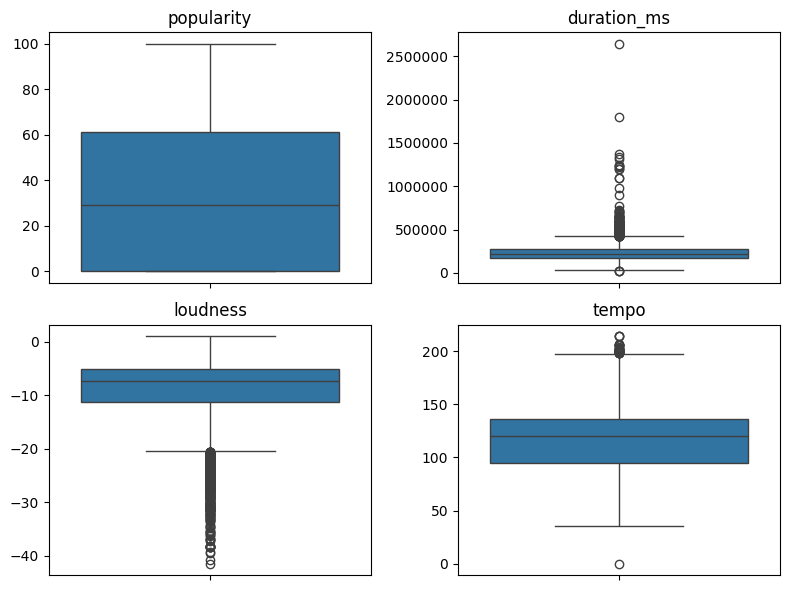

In [27]:
# Create boxplots for continuous variables without a defined range
continuous_var_other = ["popularity","duration_ms","loudness","tempo"]

plt.figure(figsize=(8,6))
for c,var in enumerate(continuous_var_other):
  plt.subplot(2,2,c+1)
  ax = sns.boxplot(data=dataset[continuous_var_other], y=var)
  ax.ticklabel_format(style='plain', axis='y')
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

The `duration_ms` variable has a few outliers with very large values (much higher than its regular distribution). <br>To identify whether these values are possible even if extreme, domain knowledge can be very useful.

In [28]:
dataset["duration_ms"].max()/60000

44.11443333333333

The track with the highest duration is 44min, which is long but not impossible. <br> These extreme values are not necessary outliers.

## **2. Multivariate Data Analysis**

Multivariate Data Analysis is used to analyze the **relationship between multiple variables** in a dataset. <br>

It can involve studying the relationship between the target variable and the features that will be used to predict it. It can also be used to compare different feature variables with correlation for example.

<img src = https://editor.analyticsvidhya.com/uploads/78011Picture3.png width = "600" height = "350" >

**Categorical and Continuous** <br>
In this example, we plotted the distribution of three variables (energy, acousticness and danceability) based on the genre. <br>
Since one of the variables is continuous, we can use a histogram.



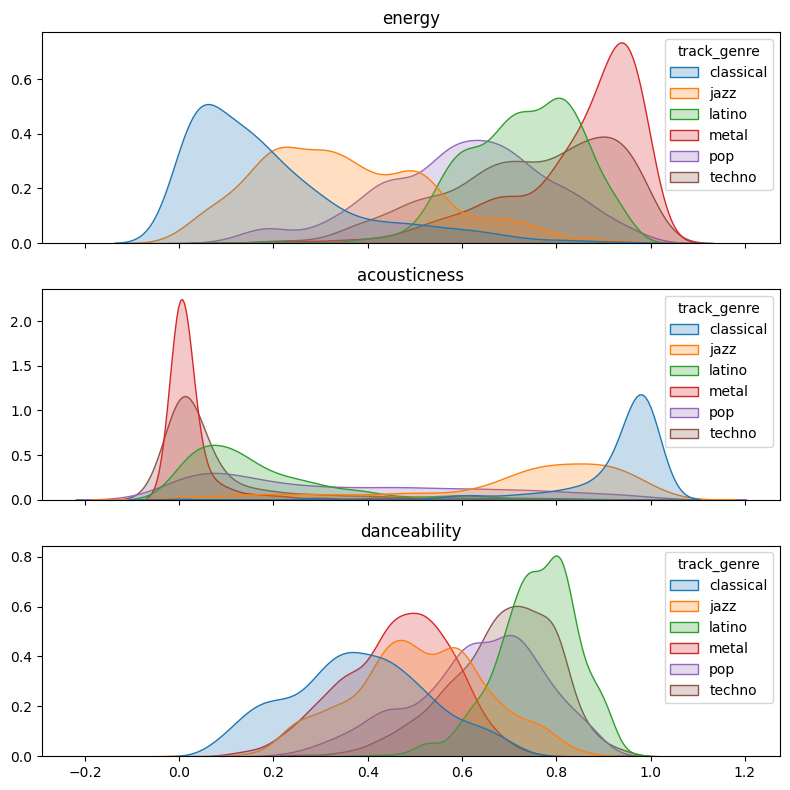

In [29]:
fig, axes = plt.subplots(3, sharex=True, figsize=(8,8))

for ax, var in zip(axes, ["energy", "acousticness", "danceability"]):
  sns.kdeplot(data=dataset, x=var, hue="track_genre", fill="track_genre",ax=ax);
  ax.set_title(var)
  ax.set_xlabel("")
  ax.set_ylabel("")

plt.tight_layout()

**Continuous and Continuous** <br>
To study multiple continuous variables, we computed the correlation coefficient between each one. <br>

Correlation is often used to identify redundant variables that can be removed from the analysis. <br> A high correlation (in absolute value) is usually above 0.8


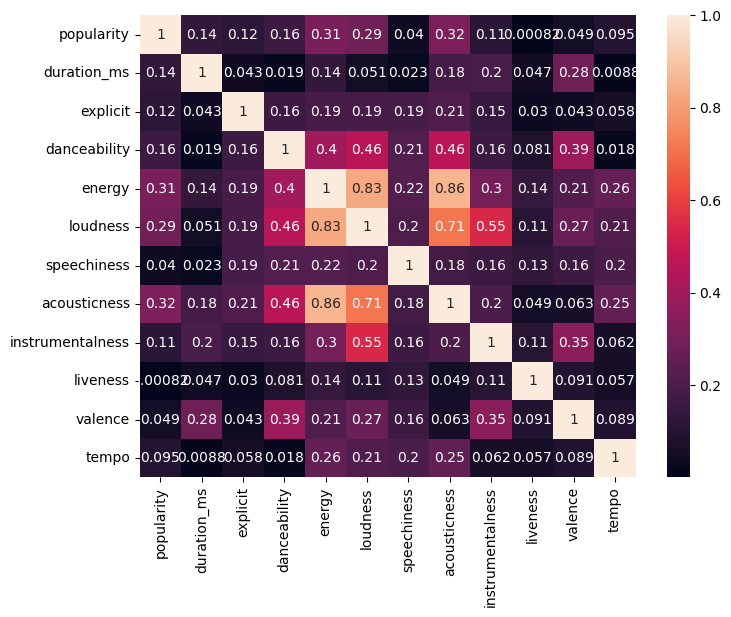

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset[continuous_var].corr().abs(),annot=True);

**Categorical and Categorical** <br>
*Stacked bar plots* are often used for multiple categorical variables. <br>
It can show how the data is distributed based on two categorical variables, instead of one.

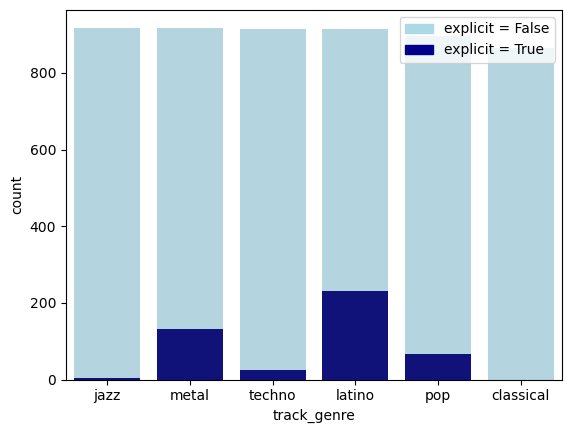

In [31]:
import matplotlib.patches as mpatches

# create dataframe to count track_genre/mode
df_genre_explicit = dataset[["track_genre","explicit"]].value_counts().to_frame("count").reset_index()

# add row for classifical genre with track_genre = True (frequency=0)
classical_explicit_True = {"track_genre":"classical","explicit":True, "count":0}
df_genre_explicit = pd.concat([df_genre_explicit, pd.DataFrame([classical_explicit_True])], ignore_index=True)

# create barplots
bar1 = sns.barplot(data=dataset["track_genre"].value_counts().to_frame("count").reset_index(names="track_genre"), x="track_genre", y="count", color='lightblue');
bar2 = sns.barplot(data=df_genre_explicit.loc[df_genre_explicit["explicit"]==True], x="track_genre", y="count", color='darkblue',);

# add legends
bottom_bar = mpatches.Patch(color='darkblue', label='explicit = True')
top_bar = mpatches.Patch(color='lightblue', label='explicit = False')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

You can also create multiple *frequency (bar) plots* for each category, instead of a stacked plot.

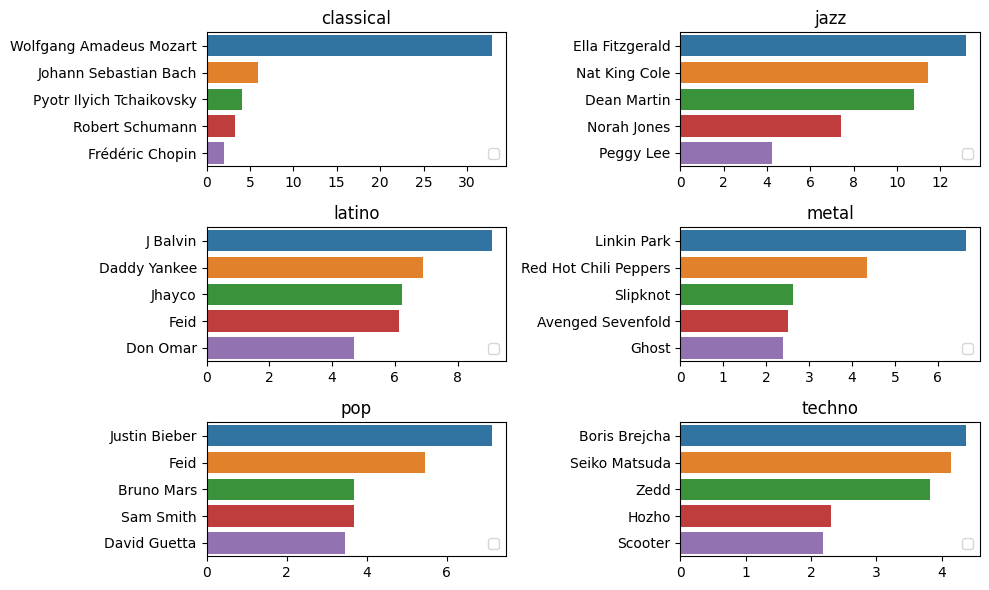

In [32]:
# Top 3 artists per genre
top_artists_per_genre = dict()
plt.figure(figsize=(10,6))

for c, genre in enumerate(dataset["track_genre"].unique()):
  df = dataset.loc[dataset["track_genre"]==genre,"artists"].value_counts(normalize=True).to_frame("frequency").reset_index(names="artists")
  df = df.sort_values(by=["frequency"],ascending=False)
  df["frequency"] = (100*df["frequency"]).round(2)
  top_artists_per_genre[genre] = df.head(1)["artists"].to_list()[0]

  plt.subplot(3,2,c+1)
  sns.barplot(data=df.head(5), x="frequency", y="artists", hue="artists")
  plt.title(genre)
  plt.xlabel("")
  plt.ylabel("")
  plt.legend("")

plt.tight_layout()

<u>Note</u>: When a categorical variable has large number of unique values, you can try to group some of these categories together. <br> This could be based on their frequency in the data or information you have on these categories.

In [33]:
top_artists = dataset["artists"].value_counts(normalize=True).head(6).index.to_list()
dataset["artists"] = dataset["artists"].apply(lambda x: x if x in top_artists else "Other")

For variables with a lot of text, you can use *word clouds* to represent frequent words. <br>
We will use this type of visualization to represent top words in tracks based on the genre.

In [34]:
# Create a dict with a single string for each genre
dict_track_genre = dict()
for genre in dataset["track_genre"].unique():
  list_tracks = dataset.loc[dataset["track_genre"]==genre,"track_name"].to_list()
  dict_track_genre[genre] = " ".join(list_tracks)

In [36]:
# Code to run to create wordclouds (doesn't work on JupyterLite)

# from wordcloud import WordCloud

# top_words_track = []
# f, axes = plt.subplots(3,2,figsize=(12, 12))
# axes = axes.flatten()

# for genre,ax in zip(dataset["track_genre"].unique(),axes):
#   wordcloud = WordCloud(width = 800, height = 500,
#                         background_color ='white',
#                         stopwords = stopwords,
#                         min_font_size = 25).generate(dict_track_genre[genre])

#   top_words_track.append(list(wordcloud.words_.keys())[0])

#   ax.imshow(wordcloud)
#   ax.set_title(genre)
#   ax.axis("off")

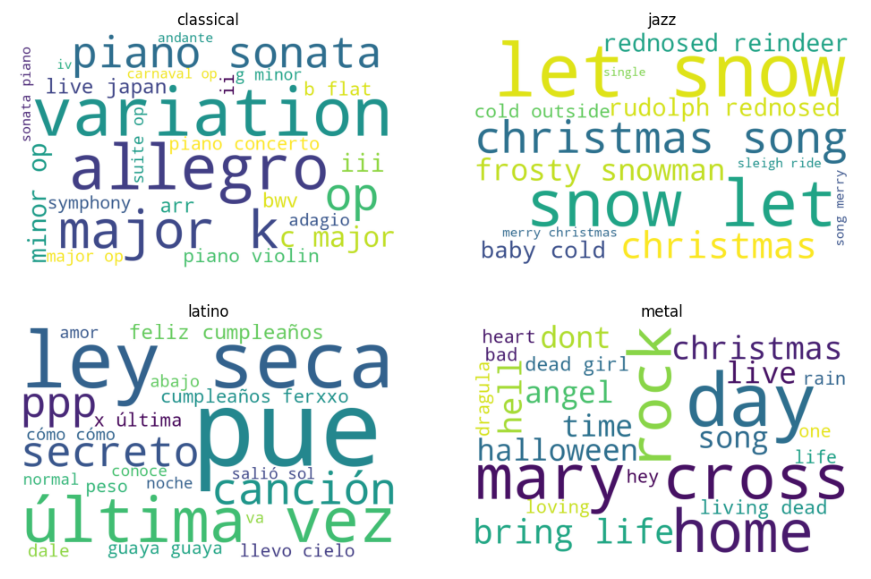

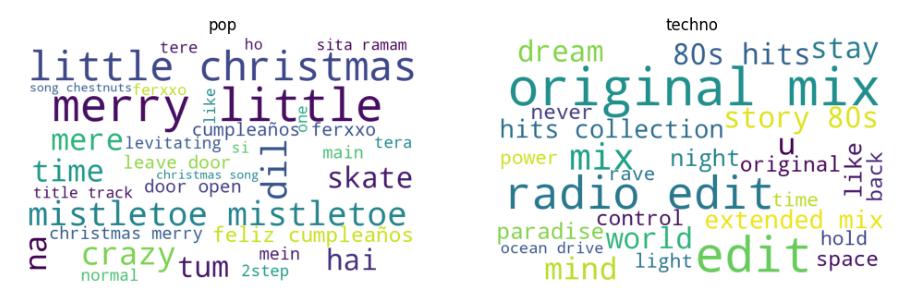

In [80]:
# Code to print images of the wordcloud, not needed if you run the previous cell 
import matplotlib.image as mpimg

# Image 1
plt.figure(figsize=(18,16))
plt.subplot(2,1,1)
img = mpimg.imread('wordcloud1.PNG')
imgplot = plt.imshow(img)
plt.axis('off')

# Image 2
plt.figure(figsize=(18,8))
plt.subplot(2,1,2)
img = mpimg.imread('wordcloud2.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [37]:
dataset.drop(columns=["track_name"], inplace=True)

# **III. Feature Engineering** ⛏️ (Data Preprocessing)

An essential step before creating a Machine Learning model is Data Preprocessing. <br> It consists of transforming features of the dataset into a proper format for a model. <br>



In [38]:
X = dataset.drop(columns=["track_genre"]) # features
y = dataset["track_genre"] # target variable

**<font size=4> <u>Train, test split</u></font>** <br>
To be able to test the performance of a model on unseen data, the original dataset is often split into a **training set** and a **test set**. <br> In most cases, a new set of observations cannot be used to test the model.
- The training set is used to train the model and learn parameters (70%-80% of the data)
- The test set is used to test the model on unseen data during training (20%-30% of the data)


<br>

<img src = https://ugc.futurelearn.com/uploads/assets/05/8a/058ad514-cb51-4107-855e-23aeace3d0e3.png width = "600" height = "300" >



**Tips**:
- The choice in the size of the test split mostly depends on the size of the original data. Small datasets usually require the test set to be small (20%), whereas large datasets can include a larger test set.

- If the target variable is unbalanced (skewed distribution of classes), you can use the `stratify=y` parameter. This will insure each class is well represented in both splits.

- It is recommended to apply data preprocessing on each set seperatly, as to avoid **Data Leakage**. The test set shouldn't contain information from the training set, as to simulate unseen data.


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

## **1. Categorical encoding**
Categorical encoding refers to the process of converting categorical data into numerical format, so that it can be used as input for algorithms to process. Most Machine Learning algorithms work with numerical data, not text so this step is essential.

Many types of encoders can be used on categorical variables. Here are important questions you should ask before selecting one.
- *What are the catergorical variables in the dataset ?* (excluding the target)
- *What are the number of unique values of the variable ?* (low or high cardinality)
- *Is the variable ordinal or nominal ?* (ordered or unordered categories)




<img src = https://miro.medium.com/v2/resize:fit:756/1*MAr4rWj6zw0Rdo01ecZu1A.png width = "650" height = "400" >

<br>

Here are a few common catgeorical encoding methods:
- Low cardinality and nominal: **One-hot encoding**
- High cardinality an nominal: **Frequency Encoding, Target Encoding**
- Ordinal variables: **Label encoding**

**What are the categorical features in the dataset ?** <br>
Our dataset has five categorical features, three of them are integers, one is a string and one is a boolean. <br>
`mode` and `time_signature` don't need to be encoded as they already have the proper format.

<br>

| Variable | Description | dtype |
|----------| ----------- | ----- |
| artists | Nominal, High cardinality (1925 unique values) | string
| explicit | Nominal, Low cardinality (True/False) | boolean
| key | Nominal, Low cardinality (11 unique values) | int
| mode | Nominal, Low cardinality (0/1) | int
| time_signature | Ordinal, Low cardinality (4 unique values) | int



<font size=4> <b><u>OneHotEncoding</u> </b> </font> <br>
OneHotEncoding consists of creating a binary variable for each category. <br>
It is the prefered method of encoding when the categorical variable is nominal.


<img src = https://miro.medium.com/v2/resize:fit:1200/1*ggtP4a5YaRx6l09KQaYOnw.png width = "600" height = "200">

OneHotEncoding shouldn't be used on variables with a high cardinality. <br>
If used, it can add a huge amount of variables which can overcomplexify your model and lead to slow model training.<br>







In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
# Select the variables to OneHotEncode in the train and test set
var_onehot = ["explicit","key","artists"]
onehot_df_train = X_train[var_onehot]
onehot_df_test = X_test[var_onehot]

In [42]:
# Fit the OneHotEncoder to the training set
onehot_enc = OneHotEncoder(sparse_output=False)
onehot_enc.fit(onehot_df_train)

OneHotEncoder(sparse_output=False)

In [43]:
# Get the new feature names created
onehot_features = onehot_enc.get_feature_names_out()

onehot_df_train_t = pd.DataFrame(onehot_enc.transform(onehot_df_train).astype("int"), columns=onehot_features)
onehot_df_test_t = pd.DataFrame(onehot_enc.transform(onehot_df_test).astype("int"), columns=onehot_features)

In [44]:
onehot_df_train_t.head()

,explicit_False,explicit_True,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,...,key_9,key_10,key_11,artists_Dean Martin,artists_Ella Fitzgerald,artists_Feid,artists_J Balvin,artists_Nat King Cole,artists_Other,artists_Wolfgang Amadeus Mozart
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [45]:
# Recreate the train and test sets with the newly encoded variables
X_train = pd.concat([X_train.drop(columns=var_onehot).reset_index(drop=True), onehot_df_train_t],axis=1)
X_test = pd.concat([X_test.drop(columns=var_onehot).reset_index(drop=True), onehot_df_test_t],axis=1)

<font size=4> <b><u>Label Encoding</u> </b> </font> <br>
For ordinal variables, you can try Label Encoding which will assign each category to a numerical value. <br> It isn't recommended to use this encoder on nominal variables as it might lead the model to misinterpret your variable.

<img src = https://www.statology.org/wp-content/uploads/2022/08/labelencode2-1.jpg width = "400" height = "250">

In [46]:
from sklearn.preprocessing import LabelEncoder

<font size=4> <b><u>Other methods:</u> Frequency and Target Encoding</b> </font> <br>
Other categorical encoding techniques can be used on features with a high cardinality. <br>

**a) Frequency encoding**: <br>
This method replaces each category in a variable by its frequency in the data.
<br>


<img src = https://www.elastic.co/guide/en/machine-learning/current/images/frequency-encoding.jpg width = "600" height = "250" >






**b) Target encoding**: <br>
This method replaces each category by their average target value/frequency. <br> If the target variable is multi-class, a variable shoud be created for each class to predict. <br>

<u>Warning </u>: Target encoding can sometimes lead to **Target Leakage**. <br> This occurs when the model is built, or trained, with information (known as the training dataset) that will not be available in unseen data, such as information on the target variable.

<br>

<!-- <img src = https://miro.medium.com/v2/resize:fit:419/1*W77md1OC9HSuAFy9b0LEIw.png width = "300" height = "400" > -->

<img src = https://miro.medium.com/v2/resize:fit:1016/1*5F7LDKbf1qRw9yvbJ2WJyw.png width = "450" height = "300">



## **2. Feature scaling**

Feature scaling consists of transforming all of the (continuous) variables in a dataset to a **similar scale**. <br>
This ensures that all features contribute equally to the model and avoids the dominance of features with larger values. It can be important for models that use euclidean distances.


In [47]:
# Select continuous variables
var_scaling = X_train.select_dtypes(include=["float64"]).columns.to_list()
var_scaling.extend(["popularity","duration_ms",'time_signature'])

In [48]:
dataset[var_scaling].head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,duration_ms,time_signature
0,0.643,0.268,-15.073,0.0900,0.593,0.000002,0.316,0.620,143.813,58,298266,4
2,0.608,0.638,-6.008,0.0292,0.581,0.017200,0.448,0.439,140.109,54,219437,4
3,0.695,0.293,-16.278,0.0431,0.596,0.015800,0.132,0.637,143.804,68,299146,4
4,0.583,0.308,-18.303,0.0465,0.581,0.010600,0.257,0.241,118.226,59,387716,4
5,0.643,0.268,-15.073,0.0900,0.593,0.000002,0.316,0.620,143.813,62,298266,4


Here are two common methods for feature scaling:
- **Normalization**  (`MinMaxScaler`): Scale features to a given range, usually between 0 and 1. <br>
Normalization is recommended for variables without a Gaussian distribution or with a small standard deviation. <br>
It isn't recommnded for variables with outliers.

- **Standardization**  (`StandardScaler`): Scale features by removing the mean and scaling to unit variance. <br>
Standardization can help reduce the presence of outliers but doesn't guarantee balanced feature scales in the presence of outliers. <br>
Outliers have an influence on the empirical mean and standard deviation computed for Standardization.

<img src = https://miro.medium.com/v2/resize:fit:744/1*HW7-kYjj6RKwrO-5WTLkDA.png width = "600" height = "300" >





In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [50]:
scaler_std = StandardScaler() # Standardization
#scaler_minmax = MinMaxScaler() # Normalization

scaler_std.fit(X_train[var_scaling])

StandardScaler()

In [51]:
X_train[var_scaling] = scaler_std.transform(X_train[var_scaling])
X_test[var_scaling] = scaler_std.transform(X_test[var_scaling])

In [52]:
X_train.head()

,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_9,key_10,key_11,artists_Dean Martin,artists_Ella Fitzgerald,artists_Feid,artists_J Balvin,artists_Nat King Cole,artists_Other,artists_Wolfgang Amadeus Mozart
0,1.451302,-0.733413,1.803416,0.343162,0.470137,0,2.419611,-0.921904,-0.610084,1.370101,...,0,0,1,0,0,0,0,0,1,0
1,-1.017717,-1.088821,-1.154433,-0.460833,-0.270538,1,-0.317630,1.261715,-0.610081,0.167557,...,0,0,0,0,0,0,0,0,1,0
2,-0.817526,2.205278,-0.701081,-2.002677,-3.860069,1,0.072185,1.628842,1.949865,-0.616011,...,0,0,0,0,0,0,0,0,0,1
3,-1.017717,-0.707367,-0.402531,-1.826571,-1.746859,1,-0.260723,1.628842,1.885376,-0.629798,...,0,0,0,0,0,0,0,0,1,0
4,-0.050128,-0.594958,1.200789,1.133113,0.688987,0,2.007033,-0.890698,-0.610084,-0.635926,...,1,0,0,0,0,0,0,0,1,0


For variables with a very skewed distribution, it is recommended to use other scalers: 
- `RobustScaler`: Scale features using statistics that are robust to outliers (median and interquartile distance). <br>
The scaling is thus not influenced by a small number of very large marginal outliers and transformed variables tend to have a similar range.

- `PowerScaler`: Apply a power transform (yeo-johnson or box-cox) to make features more Gaussian-like. <br>
A non-linear transformation can reduce the scale of outliers in a variable.

To learn about the impact of different scalers on variables, you can read this [page](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

<font size=4> <b>Bonus: <u>Feature selection</u></b> </font> <br>
Another popular preprocessing techniques is **Feature selection**. <br> 
Feature selection is the process of selecting a subset of relevant features for your model.

Scikit-learn has many functions to perform Feature selection (`VarianceThreshold`, `SelectKBest`, `RFE`...)  <br> 
You can find more information about these methods [here](https://scikit-learn.org/stable/modules/feature_selection.html).

<img src = https://blog.knoldus.com/wp-content/uploads/2022/02/feature-selection-techniques-in-machine-learning2.png width = "600" height = "300" >




## **3. Scikit-learn pipeline**

Pipelines can be useful to test different strategies to replace missing values as well as multiple data pre-processing methods. <br>
It also allows you to transform the training and test set seperatly and limit the risks of Data Leakage.

Scikit-learn has two functions to create preprocessing pipelines:
- `Pipeline`: Apply multiple transformations to the same columns
- `ColumnTransformer`: Transform each column set separately before combining them later.

<img src = https://miro.medium.com/v2/resize:fit:1200/1*LdwXVtec9-Byt-lOO7Csyg.png width = "600" height = "300" >

Any scikit-learn transformer (encoder, scaler,...) can be used in a pre-processing pipeline. <br>
You can also add a missing value imputer (for example `SimpleImputer`) and Machine Learning models to a pipeline.


Let's build a pipeline to predict the popularity variable.

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [54]:
# Train, test split for predicting "popularity"
X_ = dataset.drop(columns=["popularity"]) # features
y_ = dataset["popularity"] # target

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_)

In [55]:
# columns for categorical pipeline
categorical_pipeline = X_.select_dtypes(include=["object"]).columns.to_list()
categorical_pipeline.append("key")

# columns for continuous pipeline
continuous_pipeline = X_.drop(columns=categorical_pipeline + ["mode", "time_signature"]).columns.to_list()

In [56]:
# Build the pipeline then fit it to training data
pipe1 = ColumnTransformer(
    [("categorical", OneHotEncoder(sparse_output=False), categorical_pipeline),
     ("continuous", StandardScaler(), continuous_pipeline)],
    sparse_threshold=0)

pipe1.fit(X_train_)

ColumnTransformer(sparse_threshold=0,
                  transformers=[('categorical',
                                 OneHotEncoder(sparse_output=False),
                                 ['artists', 'track_genre', 'key']),
                                ('continuous', StandardScaler(),
                                 ['duration_ms', 'explicit', 'danceability',
                                  'energy', 'loudness', 'speechiness',
                                  'acousticness', 'instrumentalness',
                                  'liveness', 'valence', 'tempo'])])

In [57]:
# Transform training and test set with pipeline
X_train_1 = pipe1.transform(X_train_)
X_test_1 = pipe1.transform(X_test_)

In [58]:
# Get new feature names
new_columns = [column.split("__")[1] for column in pipe1.get_feature_names_out()]

# Rebuild a dataframe with new features
X_train_1 = pd.DataFrame(X_train_1, columns=new_columns)
X_test_1 = pd.DataFrame(X_test_1, columns=new_columns)

**Tips**: If you need to apply more than one pre-processing step to a set of columns, you can use the `Pipeline` function to add these steps to `ColumnTransformer`.

<font size='5'>**The course ends here, thank you for listening !** </font><br>
This notebook is available on HFactory.


See you on November 16 and 21 for two **Round Tables** on Supply Chain and AI with Hi! PARIS' corporate donors. <br>
As for the next **course on Machine Learning**, see you November 27.

